# MultiTask

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
img_zip_path = "/content/gdrive/MyDrive/CelebA_Dataset.zip"

In [3]:
import os
import zipfile
import pandas as pd
import numpy as np
     

In [4]:

zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
labels_path = '/content/list_attr_celeba.txt'

In [6]:

labels_df = pd.read_csv(labels_path)

In [7]:

labels_df.head()

,202599
0,5_o_Clock_Shadow Arched_Eyebrows Attractive Ba...
1,000001.jpg -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1...
2,000002.jpg -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1...
3,000003.jpg -1 -1 -1 -1 -1 -1 1 -1 -1 -1 1 -1...
4,000004.jpg -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1...


In [8]:

label_dict = {}
for i in range(1, len(labels_df)):
    label_dict[labels_df['202599'][i].split()[0]] = [x for x in labels_df['202599'][i].split()[1:]]

In [9]:
label_df = pd.DataFrame(label_dict).T

In [10]:
label_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [11]:
label_df.columns = (labels_df['202599'][0]).split()

In [12]:
label_df.replace(['-1'], ['0'], inplace = True)

In [13]:

from PIL import Image

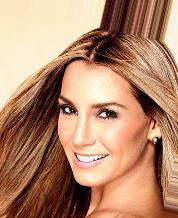

In [14]:
Image.open('img_align_celeba/000001.jpg')

In [15]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


In [16]:
label_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
202596.jpg,0,0,0,0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
202597.jpg,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
202598.jpg,0,1,1,0,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1


In [17]:
# Split the data into features and target variable
X = label_df.iloc[:, :-1] # Extract all columns except the last one as features
y = label_df.iloc[:, -1] # Extract the last column as the target variable

# Use mutual information to select the top 8 features
k = 8 # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# Print the names of the selected features
print(selected_features)

Index(['Attractive', 'Big_Nose', 'Double_Chin', 'Gray_Hair', 'Heavy_Makeup',
       'Male', 'No_Beard', 'Wearing_Lipstick'],
      dtype='object')


In [18]:
label_df = label_df[selected_features]

# Print the first few rows of the subset
label_df.head()

,Attractive,Big_Nose,Double_Chin,Gray_Hair,Heavy_Makeup,Male,No_Beard,Wearing_Lipstick
000001.jpg,1,0,0,0,1,0,1,1
000002.jpg,0,1,0,0,0,0,1,0
000003.jpg,0,0,0,0,0,1,1,0
000004.jpg,1,0,0,0,0,0,1,1
000005.jpg,1,0,0,0,1,0,1,1


In [19]:
label_df.index

Index(['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg',
       '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg',
       ...
       '202590.jpg', '202591.jpg', '202592.jpg', '202593.jpg', '202594.jpg',
       '202595.jpg', '202596.jpg', '202597.jpg', '202598.jpg', '202599.jpg'],
      dtype='object', length=202599)

In [20]:
from glob import glob
files = glob('img_align_celeba/*.jpg')     

In [21]:
shuffle = np.random.permutation(len(files))

In [22]:
for i in ['train', 'valid']:
    os.mkdir(os.path.join('/tmp/', i))

In [23]:
!ls /tmp/

dap_multiplexer.5315c5dcbf15.root.log.INFO.20230416-074356.103
dap_multiplexer.INFO
debugger_1iuj7ide0i
directoryprefetcher_binary.5315c5dcbf15.root.log.INFO.20230416-074441.545
directoryprefetcher_binary.INFO
drivefs_ipc.0
drivefs_ipc.0_shell
initgoogle_syslog_dir.0
pyright-240-4UlOAgaiMh60
pyright-240-q1Y3jdAnWlSV
python-languageserver-cancellation
train
valid


In [24]:
files[10].split('/')[-1]

'041344.jpg'

In [25]:
((np.array(label_df[label_df.index==files[10].split('/')[-1]]))).shape

(1, 8)

In [26]:
from tqdm import tqdm
valid_dict = {}
valid_file_names = []
for i in tqdm(shuffle[:6000]):
    file_name = files[i].split('/')[-1]
    labels = np.array(label_df[label_df.index==file_name])
    valid_dict[file_name] = labels
    valid_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/valid', file_name))
len(glob('/tmp/valid/*.jpg'))

100%|██████████| 6000/6000 [02:55<00:00, 34.16it/s]


6000

In [27]:
len(valid_dict)

6000

In [28]:
valid_dict

{'077946.jpg': array([['0', '1', '1', '0', '0', '1', '1', '0']], dtype=object),
 '187215.jpg': array([['0', '0', '0', '0', '1', '0', '1', '1']], dtype=object),
 '146610.jpg': array([['1', '1', '0', '0', '0', '1', '0', '0']], dtype=object),
 '016822.jpg': array([['1', '0', '0', '0', '1', '0', '1', '1']], dtype=object),
 '124168.jpg': array([['1', '0', '0', '0', '0', '0', '1', '1']], dtype=object),
 '050766.jpg': array([['1', '0', '0', '0', '0', '0', '1', '0']], dtype=object),
 '155324.jpg': array([['0', '0', '0', '0', '0', '0', '1', '0']], dtype=object),
 '059003.jpg': array([['1', '0', '0', '0', '0', '1', '0', '0']], dtype=object),
 '010001.jpg': array([['0', '0', '0', '0', '0', '1', '0', '0']], dtype=object),
 '060401.jpg': array([['0', '0', '0', '0', '0', '1', '1', '0']], dtype=object),
 '027301.jpg': array([['1', '0', '0', '0', '0', '1', '1', '0']], dtype=object),
 '161778.jpg': array([['1', '0', '0', '0', '0', '1', '1', '0']], dtype=object),
 '064537.jpg': array([['1', '0', '0', '0

In [29]:
len(glob('/tmp/valid/*.jpg'))

6000

In [30]:
valid_df = pd.DataFrame([np.ravel(v) for v in valid_dict.values()], index=valid_dict.keys())


In [31]:
valid_df

,0,1,2,3,4,5,6,7
077946.jpg,0,1,1,0,0,1,1,0
187215.jpg,0,0,0,0,1,0,1,1
146610.jpg,1,1,0,0,0,1,0,0
016822.jpg,1,0,0,0,1,0,1,1
124168.jpg,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
135381.jpg,1,0,0,0,1,0,1,1
094299.jpg,0,0,0,0,0,1,1,0
124055.jpg,0,0,0,0,0,0,1,1
026974.jpg,0,0,0,0,0,0,1,0


In [32]:
valid_df.index = valid_file_names

In [33]:
valid_df.head()

,0,1,2,3,4,5,6,7
077946.jpg,0,1,1,0,0,1,1,0
187215.jpg,0,0,0,0,1,0,1,1
146610.jpg,1,1,0,0,0,1,0,0
016822.jpg,1,0,0,0,1,0,1,1
124168.jpg,1,0,0,0,0,0,1,1


In [34]:
valid_df['labels'] = valid_df.apply(lambda x: ''.join(x.astype(str)), axis=1)

# Remove original columns
valid_df = valid_df[['labels']]

In [35]:
valid_df['labels'] = valid_df['labels'].apply(lambda x: [[int(c) for c in x]])

print(valid_df)

                                labels
077946.jpg  [[0, 1, 1, 0, 0, 1, 1, 0]]
187215.jpg  [[0, 0, 0, 0, 1, 0, 1, 1]]
146610.jpg  [[1, 1, 0, 0, 0, 1, 0, 0]]
016822.jpg  [[1, 0, 0, 0, 1, 0, 1, 1]]
124168.jpg  [[1, 0, 0, 0, 0, 0, 1, 1]]
...                                ...
135381.jpg  [[1, 0, 0, 0, 1, 0, 1, 1]]
094299.jpg  [[0, 0, 0, 0, 0, 1, 1, 0]]
124055.jpg  [[0, 0, 0, 0, 0, 0, 1, 1]]
026974.jpg  [[0, 0, 0, 0, 0, 0, 1, 0]]
051011.jpg  [[0, 0, 0, 0, 1, 0, 1, 1]]

[6000 rows x 1 columns]


<ipython-input-35-964e2d392dcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['labels'] = valid_df['labels'].apply(lambda x: [[int(c) for c in x]])


In [36]:
valid_df

,labels
077946.jpg,"[[0, 1, 1, 0, 0, 1, 1, 0]]"
187215.jpg,"[[0, 0, 0, 0, 1, 0, 1, 1]]"
146610.jpg,"[[1, 1, 0, 0, 0, 1, 0, 0]]"
016822.jpg,"[[1, 0, 0, 0, 1, 0, 1, 1]]"
124168.jpg,"[[1, 0, 0, 0, 0, 0, 1, 1]]"
...,...
135381.jpg,"[[1, 0, 0, 0, 1, 0, 1, 1]]"
094299.jpg,"[[0, 0, 0, 0, 0, 1, 1, 0]]"
124055.jpg,"[[0, 0, 0, 0, 0, 0, 1, 1]]"
026974.jpg,"[[0, 0, 0, 0, 0, 0, 1, 0]]"


In [37]:

train_dict = {}
train_file_names = []
for i in tqdm(shuffle[6000:18000 ]):
    file_name = files[i].split('/')[-1]
    labels = np.array(label_df[label_df.index==file_name])
    train_dict[file_name] = labels
    train_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/train', file_name))

100%|██████████| 12000/12000 [05:47<00:00, 34.56it/s]


In [38]:
train_df = pd.DataFrame([np.ravel(v) for v in train_dict.values()], index=train_dict.keys())
train_df.index = train_file_names
train_df['labels'] = train_df.apply(lambda x: ''.join(x.astype(str)), axis=1)
train_df = train_df[['labels']]
train_df['labels'] = train_df['labels'].apply(lambda x: [[int(c) for c in x]])

<ipython-input-38-b546765abd1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['labels'] = train_df['labels'].apply(lambda x: [[int(c) for c in x]])


In [39]:
train_df


,labels
088653.jpg,"[[0, 0, 0, 0, 0, 1, 1, 0]]"
048440.jpg,"[[0, 1, 0, 0, 0, 1, 0, 0]]"
095646.jpg,"[[1, 1, 0, 0, 1, 0, 1, 1]]"
032072.jpg,"[[1, 0, 0, 0, 0, 1, 0, 0]]"
199002.jpg,"[[1, 0, 0, 0, 0, 1, 1, 0]]"
...,...
041837.jpg,"[[0, 0, 0, 0, 1, 0, 1, 1]]"
173311.jpg,"[[1, 0, 0, 0, 1, 0, 1, 1]]"
100816.jpg,"[[1, 0, 0, 0, 0, 0, 1, 1]]"
030327.jpg,"[[1, 0, 0, 0, 0, 0, 1, 0]]"


In [40]:
import torchvision

In [41]:
from glob import glob
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid
import time
%matplotlib inline

In [42]:
from torch.utils.data import Dataset

class MultiClassCelebA(Dataset):
    
    def __init__(self, dataframe, folder_dir, transform = None):
        
        self.dataframe = dataframe
        self.folder_dir = folder_dir
        self.transform = transform
        self.file_names = dataframe.index
        self.labels = dataframe.labels.values.tolist()
        
        
    def __len__(self):
        return len(self.dataframe)
    
    
    def __getitem__(self, index):
        
        image = Image.open(os.path.join(self.folder_dir, self.file_names[index]))
        label = self.labels[index][0]
        label = [float(i) for i in label]
        label = np.array(label, dtype=float)
        

        sample = {'image': image, 'label': label}
        if self.transform:
            image = self.transform(sample['image'])
            sample = {'image': image, 'label': label}
        
        return sample

In [43]:

tfms = transforms.Compose([transforms.Resize((128, 128)),
                           transforms.ToTensor()])

In [44]:
train_dl = MultiClassCelebA(train_df, '/tmp/train/', transform = tfms)

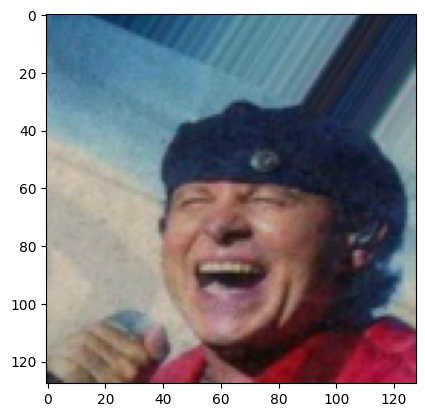

In [45]:
plt.imshow(torchvision.utils.make_grid(train_dl[1]['image']).permute(1, 2, 0))

In [46]:
type(train_dl[1]['label'][0])

numpy.float64

In [47]:
valid_dl = MultiClassCelebA(valid_df, '/tmp/valid/', transform = tfms)

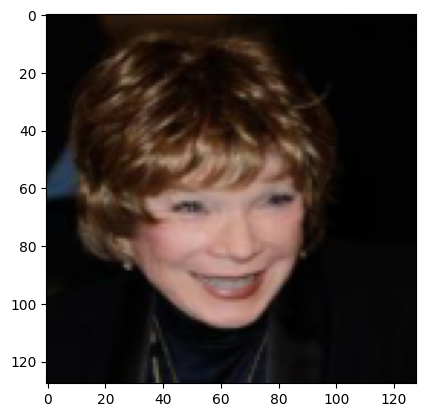

In [48]:

plt.imshow(torchvision.utils.make_grid(valid_dl[1]['image']).permute(1,2,0))

In [49]:
valid_dl[1]['label']

array([0., 0., 0., 0., 1., 0., 1., 1.])

In [50]:
import torch.nn.functional as F

In [51]:
train_dataloader = torch.utils.data.DataLoader(train_dl, shuffle = True, batch_size = 64, num_workers = 3)
valid_dataloader = torch.utils.data.DataLoader(valid_dl, shuffle = True, batch_size = 64, num_workers = 3)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset


In [53]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50

In [54]:

# define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.backbone = resnet50(pretrained=False)
        self.backbone.fc = nn.Sequential()  
        self.fc1 = nn.Linear(2048, 1024)
        self.classifier1 = nn.Linear(1024, 1)
        self.classifier2 = nn.Linear(1024, 1)
        self.classifier3 = nn.Linear(1024, 1)
        self.classifier4 = nn.Linear(1024, 1)
        self.classifier5 = nn.Linear(1024, 1)
        self.classifier6 = nn.Linear(1024, 1)
        self.classifier7 = nn.Linear(1024, 1)
        self.classifier8 = nn.Linear(1024, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.backbone(x)
        x = self.fc1(x)
        #x = torch.flatten(x, 1)
        x1 = self.sigmoid(self.classifier1(x))
        x2 = self.sigmoid(self.classifier2(x))
        x3 = self.sigmoid(self.classifier3(x))
        x4 = self.sigmoid(self.classifier4(x))
        x5 = self.sigmoid(self.classifier5(x))
        x6 = self.sigmoid(self.classifier6(x))
        x7 = self.sigmoid(self.classifier7(x))
        x8 = self.sigmoid(self.classifier8(x))
        return x1, x2, x3, x4, x5, x6, x7, x8


In [55]:
learning_rate = 0.001
batch_size = 64
num_epochs = 10

In [56]:
criterion = nn.BCELoss()

In [57]:
model=MyModel()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [58]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [59]:
model=model.to(device)

In [60]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# import torch

# # Example tensor
# tensor = torch.tensor([[0.6194], [0.6110], [0.5198], [0.5981]])

# # Flatten the tensor to remove any singleton dimensions
# # result = torch.flatten(torch.round(tensor))

# print(result)

In [61]:
criterion = nn.BCELoss()

# Initialize the model
model = MyModel().to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10

overallaccuracy=[]
overallloss=[]

taskloss=[[],[],[],[],[],[],[],[]]
taskaccuracy=[[],[],[],[],[],[],[],[]]

for epoch in range(num_epochs):
    train_loss=0
    task_losses = [0]*8
    task_correct = [0]*8
    total_samples = 0
    overall_acc =0
    for i, data in enumerate(train_dataloader):
        inputs, target = data['image'], data['label'].float()
        
        inputs, target = Variable(inputs).to(device), Variable(target).to(device)
        optimizer.zero_grad()
        o1, o2, o3, o4, o5, o6, o7, o8 = model(inputs)
        
        total_samples += target.size(0)
        
        loss1 = criterion(torch.flatten(o1),  target[:,0])
        #print(loss1)
        loss2 = criterion(torch.flatten(o2), target[:,1])
        loss3 = criterion(torch.flatten(o3), target[:,2])
        loss4 = criterion(torch.flatten(o4), target[:,3])
        loss5 = criterion(torch.flatten(o5), target[:,4])
        loss6 = criterion(torch.flatten(o6), target[:,5])
        loss7 = criterion(torch.flatten(o7), target[:,6])
        loss8 = criterion(torch.flatten(o8), target[:,7])

        task_losses[0] += loss1.item()
        task_losses[1] += loss2.item()
        task_losses[2] += loss3.item()
        task_losses[3] += loss4.item()
        task_losses[4] += loss5.item()
        task_losses[5] += loss6.item()
        task_losses[6] += loss7.item()
        task_losses[7] += loss8.item()

      
        task_correct[0] += ((o1 > 0.5) == target[:, 0].unsqueeze(1)).sum().item()
        task_correct[1] += ((o2 > 0.5) == target[:, 1].unsqueeze(1)).sum().item()
        task_correct[2] += ((o3 > 0.5) == target[:, 2].unsqueeze(1)).sum().item()
        task_correct[3] += ((o4 > 0.5) == target[:, 3].unsqueeze(1)).sum().item()
        task_correct[4] += ((o5 > 0.5) == target[:, 4].unsqueeze(1)).sum().item()
        task_correct[5] += ((o6 > 0.5) == target[:, 5].unsqueeze(1)).sum().item()
        task_correct[6] += ((o7 > 0.5) == target[:, 6].unsqueeze(1)).sum().item()
        task_correct[7] += ((o8 > 0.5) == target[:, 7].unsqueeze(1)).sum().item()
        
        
        loss = criterion(torch.cat([o1, o2, o3, o4, o5, o6, o7, o8], dim=1), target)
        train_loss=train_loss+loss.item()
        overall_acc = sum(task_correct)/total_samples
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {epoch},  Overall Accuracy = {overall_acc/8*100}")
    overallaccuracy.append(overall_acc/8*100)
    print(f"Epoch {epoch}, Loss = {train_loss/len(train_dataloader)}")
    overallloss.append(train_loss/len(train_dataloader))

    for i in range(8):

         taskloss[i].append(task_losses[i]/len(train_dataloader)) 
         taskaccuracy[i].append(task_correct[i]/total_samples*100)
         print(f"Task {i+1}, Loss = {task_losses[i]/len(train_dataloader)}, Accuracy = {task_correct[i]/total_samples*100}")    
    

Epoch 0,  Overall Accuracy = 75.96666666666667
Epoch 0, Loss = 0.742132287551748
Task 1, Loss = 1.0419971700361434, Accuracy = 59.199999999999996
Task 2, Loss = 0.6813933365839593, Accuracy = 76.51666666666667
Task 3, Loss = 0.2665716609917581, Accuracy = 94.77499999999999
Task 4, Loss = 0.2218893724830002, Accuracy = 95.625
Task 5, Loss = 0.9882319652019663, Accuracy = 67.66666666666666
Task 6, Loss = 1.1557805061023285, Accuracy = 66.85833333333333
Task 7, Loss = 0.7439038515725034, Accuracy = 82.98333333333333
Task 8, Loss = 0.8372904434007533, Accuracy = 64.10833333333333
Epoch 1,  Overall Accuracy = 85.62708333333333
Epoch 1, Loss = 0.32437418131752216
Task 1, Loss = 0.5777464562908132, Accuracy = 71.40833333333333
Task 2, Loss = 0.4862611159048182, Accuracy = 76.53333333333333
Task 3, Loss = 0.17781429654086364, Accuracy = 95.19166666666666
Task 4, Loss = 0.15134952565100282, Accuracy = 96.06666666666666
Task 5, Loss = 0.32681311452959444, Accuracy = 85.43333333333332
Task 6, Los

# copy

In [62]:
task_correct = [0]*8
total_samples = 0
overall_acc =0
for i, data in enumerate(valid_dataloader):
        model.eval()
        inputs, target = data['image'], data['label'].float()
        
        inputs, target = Variable(inputs).to(device), Variable(target).to(device)
        optimizer.zero_grad()
        o1, o2, o3, o4, o5, o6, o7, o8 = model(inputs)
        
        total_samples += target.size(0)
        
      
        task_correct[0] += ((o1 > 0.5) == target[:, 0].unsqueeze(1)).sum().item()
        task_correct[1] += ((o2 > 0.5) == target[:, 1].unsqueeze(1)).sum().item()
        task_correct[2] += ((o3 > 0.5) == target[:, 2].unsqueeze(1)).sum().item()
        task_correct[3] += ((o4 > 0.5) == target[:, 3].unsqueeze(1)).sum().item()
        task_correct[4] += ((o5 > 0.5) == target[:, 4].unsqueeze(1)).sum().item()
        task_correct[5] += ((o6 > 0.5) == target[:, 5].unsqueeze(1)).sum().item()
        task_correct[6] += ((o7 > 0.5) == target[:, 6].unsqueeze(1)).sum().item()
        task_correct[7] += ((o8 > 0.5) == target[:, 7].unsqueeze(1)).sum().item()
        
 
        overall_acc = sum(task_correct)/total_samples
    
print(overall_acc/8*100)

for i in range(8):

        
         print(f"Task {i+1}, Loss = {task_correct[i]/total_samples*100}")

87.27916666666667
Task 1, Loss = 70.78333333333333
Task 2, Loss = 78.55
Task 3, Loss = 92.81666666666666
Task 4, Loss = 96.86666666666667
Task 5, Loss = 86.16666666666667
Task 6, Loss = 92.01666666666667
Task 7, Loss = 90.86666666666666
Task 8, Loss = 90.16666666666666


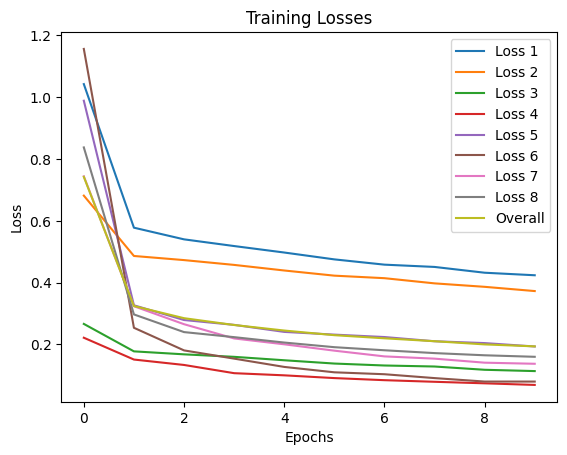

In [63]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot all 8 lists on the same plot
ax.plot(taskloss[0],label='Loss 1')
ax.plot(taskloss[1],label='Loss 2')
ax.plot(taskloss[2],label='Loss 3')
ax.plot(taskloss[3],label='Loss 4')
ax.plot(taskloss[4],label='Loss 5')
ax.plot(taskloss[5],label='Loss 6')
ax.plot(taskloss[6],label='Loss 7')
ax.plot(taskloss[7],label='Loss 8')
ax.plot(overallloss,label='Overall')



# Set the x-axis label
ax.set_xlabel('Epochs')

# Set the y-axis label
ax.set_ylabel('Loss')

# Set the title of the plot
ax.set_title('Training Losses')
ax.legend()
# Show the plot
plt.show()

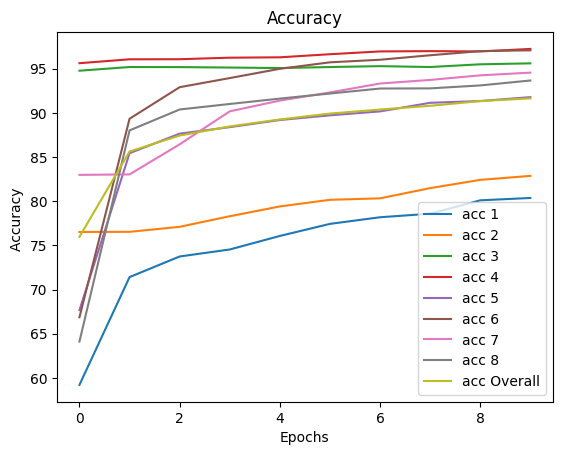

In [64]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot all 8 lists on the same plot
ax.plot(taskaccuracy[0],label='acc 1')
ax.plot(taskaccuracy[1],label='acc 2')
ax.plot(taskaccuracy[2],label='acc 3')
ax.plot(taskaccuracy[3],label='acc 4')
ax.plot(taskaccuracy[4],label='acc 5')
ax.plot(taskaccuracy[5],label='acc 6')
ax.plot(taskaccuracy[6],label='acc 7')
ax.plot(taskaccuracy[7],label='acc 8')
ax.plot(overallaccuracy,label='acc Overall')



# Set the x-axis label
ax.set_xlabel('Epochs')

# Set the y-axis label
ax.set_ylabel('Accuracy ')

# Set the title of the plot
ax.set_title('Accuracy')
ax.legend()
# Show the plot
plt.show()

# DST

In [65]:
def returnG(p):
  dist = torch.distributions.Bernoulli(probs=p)

# sample from the distribution
  sample = dist.sample()

  return sample

In [68]:
criterion = nn.BCELoss()

# Initialize the model
model = MyModel().to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
v1=0
v2=0
v3=0
v4=0
v5=0
v6=0
v7=0
v8=0

overallaccuracy=[]
overallloss=[]

taskloss=[[],[],[],[],[],[],[],[]]
taskaccuracy=[[],[],[],[],[],[],[],[]]

droprates=[[],[],[],[],[],[],[],[]]
lambdap=0.5
pbt=1
for epoch in range(num_epochs):
    train_loss=0
    task_losses = [0]*8
    task_dropouts = [0]*8
    task_correct = [0]*8
    total_samples = 0
    overall_acc =0
    if(epoch==0):

        for i, data in enumerate(train_dataloader):
            inputs, target = data['image'], data['label'].float()
            
            inputs, target = Variable(inputs).to(device), Variable(target).to(device)
            optimizer.zero_grad()
            o1, o2, o3, o4, o5, o6, o7, o8 = model(inputs)
            
            total_samples += target.size(0)

            loss1 = criterion(torch.flatten(o1),  target[:,0])
            loss2 = criterion(torch.flatten(o2), target[:,1])
            loss3 = criterion(torch.flatten(o3), target[:,2])
            loss4 = criterion(torch.flatten(o4), target[:,3])
            loss5 = criterion(torch.flatten(o5), target[:,4])
            loss6 = criterion(torch.flatten(o6), target[:,5])
            loss7 = criterion(torch.flatten(o7), target[:,6])
            loss8 = criterion(torch.flatten(o8), target[:,7])

            task_losses[0] += loss1.item()
            task_losses[1] += loss2.item()
            task_losses[2] += loss3.item()
            task_losses[3] += loss4.item()
            task_losses[4] += loss5.item()
            task_losses[5] += loss6.item()
            task_losses[6] += loss7.item()
            task_losses[7] += loss8.item()


            task_correct[0] += ((o1 > 0.5) == target[:, 0].unsqueeze(1)).sum().item()
            task_correct[1] += ((o2 > 0.5) == target[:, 1].unsqueeze(1)).sum().item()
            task_correct[2] += ((o3 > 0.5) == target[:, 2].unsqueeze(1)).sum().item()
            task_correct[3] += ((o4 > 0.5) == target[:, 3].unsqueeze(1)).sum().item()
            task_correct[4] += ((o5 > 0.5) == target[:, 4].unsqueeze(1)).sum().item()
            task_correct[5] += ((o6 > 0.5) == target[:, 5].unsqueeze(1)).sum().item()
            task_correct[6] += ((o7 > 0.5) == target[:, 6].unsqueeze(1)).sum().item()
            task_correct[7] += ((o8 > 0.5) == target[:, 7].unsqueeze(1)).sum().item()
            
            
            loss = criterion(torch.cat([o1, o2, o3, o4, o5, o6, o7, o8], dim=1), target)
            train_loss=train_loss+loss.item()
            overall_acc = sum(task_correct)/total_samples
            loss.backward()
            optimizer.step()
            
        print(f"Epoch {epoch},  Overall Accuracy = {overall_acc/8*100}")
        overallaccuracy.append(overall_acc/8*100)
        print(f"Epoch {epoch}, Loss = {train_loss/len(train_dataloader)}")
        overallloss.append(train_loss/len(train_dataloader))
        v1=task_losses[0]/len(train_dataloader)
        v2=task_losses[1]/len(train_dataloader)
        v3=task_losses[2]/len(train_dataloader)
        v4=task_losses[3]/len(train_dataloader)
        v5=task_losses[4]/len(train_dataloader)
        v6=task_losses[5]/len(train_dataloader)
        v7=task_losses[6]/len(train_dataloader)
        v8=task_losses[7]/len(train_dataloader)
        for i in range(8):

          taskloss[i].append(task_losses[i]/len(train_dataloader)) 
          taskaccuracy[i].append(task_correct[i]/total_samples*100)
          print(f"Task {i+1}, Loss = {task_losses[i]/len(train_dataloader)}, Accuracy = {task_correct[i]/total_samples*100}") 

    else:

      for i, data in enumerate(train_dataloader):
            inputs, target = data['image'], data['label'].float()
            
            inputs, target = Variable(inputs).to(device), Variable(target).to(device)
            optimizer.zero_grad()
            o1, o2, o3, o4, o5, o6, o7, o8 = model(inputs)
            
            total_samples += target.size(0)
            loss1 = criterion(torch.flatten(o1),  target[:,0])
            loss2 = criterion(torch.flatten(o2), target[:,1])
            loss3 = criterion(torch.flatten(o3), target[:,2])
            loss4 = criterion(torch.flatten(o4), target[:,3])
            loss5 = criterion(torch.flatten(o5), target[:,4])
            loss6 = criterion(torch.flatten(o6), target[:,5])
            loss7 = criterion(torch.flatten(o7), target[:,6])
            loss8 = criterion(torch.flatten(o8), target[:,7])

            i1=loss1/v1
            i2=loss2/v2
            i3=loss3/v3
            i4=loss4/v4
            i5=loss5/v1
            i6=loss6/v6
            i7=loss7/v7
            i8=loss8/v8

            e=(i1+i2+i3+i4+i5+i6+i7+i8)/8

            p1=lambdap*(torch.min(torch.tensor(1),i1/e)) +(1-lambdap)*pbt
            p2=lambdap*(torch.min(torch.tensor(1),i2/e)) +(1-lambdap)*pbt
            p3=lambdap*(torch.min(torch.tensor(1),i3/e)) +(1-lambdap)*pbt
            p4=lambdap*(torch.min(torch.tensor(1),i4/e)) +(1-lambdap)*pbt
            p5=lambdap*(torch.min(torch.tensor(1),i5/e)) +(1-lambdap)*pbt
            p6=lambdap*(torch.min(torch.tensor(1),i6/e)) +(1-lambdap)*pbt
            p7=lambdap*(torch.min(torch.tensor(1),i7/e)) +(1-lambdap)*pbt
            p8=lambdap*(torch.min(torch.tensor(1),i8/e)) +(1-lambdap)*pbt

            task_dropouts[0] += p1
            task_dropouts[1] += p2
            task_dropouts[2] += p3
            task_dropouts[3] += p4
            task_dropouts[4] += p5
            task_dropouts[5] += p6
            task_dropouts[6] += p7
            task_dropouts[7] += p8  

            g1=returnG(p1)
            g2=returnG(p2)
            g3=returnG(p3)
            g4=returnG(p4)
            g5=returnG(p5)
            g6=returnG(p6)
            g7=returnG(p7)
            g8=returnG(p8)

            task_losses[0] += loss1.item()
            task_losses[1] += loss2.item()
            task_losses[2] += loss3.item()
            task_losses[3] += loss4.item()
            task_losses[4] += loss5.item()
            task_losses[5] += loss6.item()
            task_losses[6] += loss7.item()
            task_losses[7] += loss8.item()

          
            task_correct[0] += ((o1 > 0.5) == target[:, 0].unsqueeze(1)).sum().item()
            task_correct[1] += ((o2 > 0.5) == target[:, 1].unsqueeze(1)).sum().item()
            task_correct[2] += ((o3 > 0.5) == target[:, 2].unsqueeze(1)).sum().item()
            task_correct[3] += ((o4 > 0.5) == target[:, 3].unsqueeze(1)).sum().item()
            task_correct[4] += ((o5 > 0.5) == target[:, 4].unsqueeze(1)).sum().item()
            task_correct[5] += ((o6 > 0.5) == target[:, 5].unsqueeze(1)).sum().item()
            task_correct[6] += ((o7 > 0.5) == target[:, 6].unsqueeze(1)).sum().item()
            task_correct[7] += ((o8 > 0.5) == target[:, 7].unsqueeze(1)).sum().item()
            
            
            loss = (loss1*g1 + loss2*g2 + loss3*g3 + loss4*g4 + loss5*g5 + loss6*g6 + loss7*g7 + loss8*g8)/(g1+g2+g3+g4+g5+g6+g7)
            train_loss=train_loss+loss.item()
            overall_acc = sum(task_correct)/total_samples
            loss.backward()
            optimizer.step()
            
      
      print(f"Epoch {epoch},  Overall Accuracy = {overall_acc/8*100}")
      overallaccuracy.append(overall_acc/8*100)
      print(f"Epoch {epoch}, Loss = {train_loss/len(train_dataloader)}")
      overallloss.append(train_loss/len(train_dataloader))
      for i in range(8):

         taskloss[i].append(task_losses[i]/len(train_dataloader)) 
         taskaccuracy[i].append(task_correct[i]/total_samples*100)
         droprates[i].append(task_dropouts[i]/len(train_dataloader))
         print(f"Task {i+1}, Loss = {task_losses[i]/len(train_dataloader)}, Accuracy = {task_correct[i]/total_samples*100}")      

Epoch 0,  Overall Accuracy = 71.65416666666667
Epoch 0, Loss = 1.0930998239745484
Task 1, Loss = 1.4420850159640008, Accuracy = 53.141666666666666
Task 2, Loss = 0.9529198786996781, Accuracy = 76.18333333333334
Task 3, Loss = 0.34841156437834525, Accuracy = 95.14166666666667
Task 4, Loss = 0.3586804987367322, Accuracy = 96.06666666666666
Task 5, Loss = 1.3890688172046175, Accuracy = 58.93333333333334
Task 6, Loss = 1.6623578943470692, Accuracy = 57.68333333333333
Task 7, Loss = 0.9031246036608168, Accuracy = 82.93333333333334
Task 8, Loss = 1.6881503405723166, Accuracy = 53.15
Epoch 1,  Overall Accuracy = 80.80208333333333
Epoch 1, Loss = 0.5237137746620686
Task 1, Loss = 0.7658452493079165, Accuracy = 65.45833333333333
Task 2, Loss = 0.5270023006708064, Accuracy = 76.59166666666667
Task 3, Loss = 0.19751559781465441, Accuracy = 95.13333333333334
Task 4, Loss = 0.16851114372702988, Accuracy = 96.03333333333333
Task 5, Loss = 0.5397777233986144, Accuracy = 76.78333333333333
Task 6, Loss

In [69]:
task_correct = [0]*8
total_samples = 0
overall_acc =0
for i, data in enumerate(valid_dataloader):
        model.eval()
        inputs, target = data['image'], data['label'].float()
        
        inputs, target = Variable(inputs).to(device), Variable(target).to(device)
        optimizer.zero_grad()
        o1, o2, o3, o4, o5, o6, o7, o8 = model(inputs)
        
        total_samples += target.size(0)
        
      
        task_correct[0] += ((o1 > 0.5) == target[:, 0].unsqueeze(1)).sum().item()
        task_correct[1] += ((o2 > 0.5) == target[:, 1].unsqueeze(1)).sum().item()
        task_correct[2] += ((o3 > 0.5) == target[:, 2].unsqueeze(1)).sum().item()
        task_correct[3] += ((o4 > 0.5) == target[:, 3].unsqueeze(1)).sum().item()
        task_correct[4] += ((o5 > 0.5) == target[:, 4].unsqueeze(1)).sum().item()
        task_correct[5] += ((o6 > 0.5) == target[:, 5].unsqueeze(1)).sum().item()
        task_correct[6] += ((o7 > 0.5) == target[:, 6].unsqueeze(1)).sum().item()
        task_correct[7] += ((o8 > 0.5) == target[:, 7].unsqueeze(1)).sum().item()
        
 
        overall_acc = sum(task_correct)/total_samples
    
print(overall_acc/8*100)

for i in range(8):

        
         print(f"Task {i+1}, Loss = {task_correct[i]/total_samples*100}")

88.79583333333333
Task 1, Loss = 75.36666666666667
Task 2, Loss = 80.41666666666667
Task 3, Loss = 95.83333333333334
Task 4, Loss = 96.7
Task 5, Loss = 87.48333333333333
Task 6, Loss = 93.26666666666667
Task 7, Loss = 91.3
Task 8, Loss = 90.0


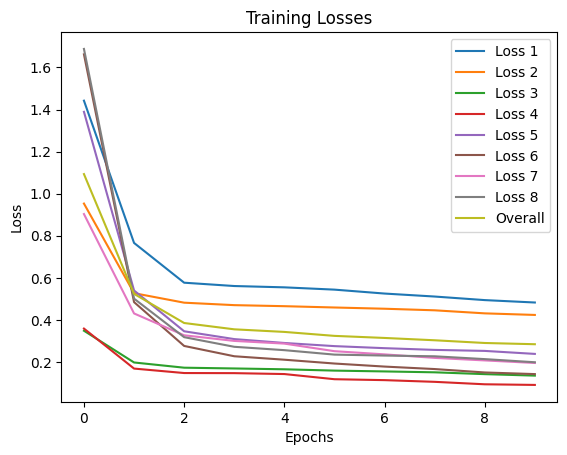

In [70]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot all 8 lists on the same plot
ax.plot(taskloss[0],label='Loss 1')
ax.plot(taskloss[1],label='Loss 2')
ax.plot(taskloss[2],label='Loss 3')
ax.plot(taskloss[3],label='Loss 4')
ax.plot(taskloss[4],label='Loss 5')
ax.plot(taskloss[5],label='Loss 6')
ax.plot(taskloss[6],label='Loss 7')
ax.plot(taskloss[7],label='Loss 8')
ax.plot(overallloss,label='Overall')



# Set the x-axis label
ax.set_xlabel('Epochs')

# Set the y-axis label
ax.set_ylabel('Loss')

# Set the title of the plot
ax.set_title('Training Losses')
ax.legend()
# Show the plot
plt.show()

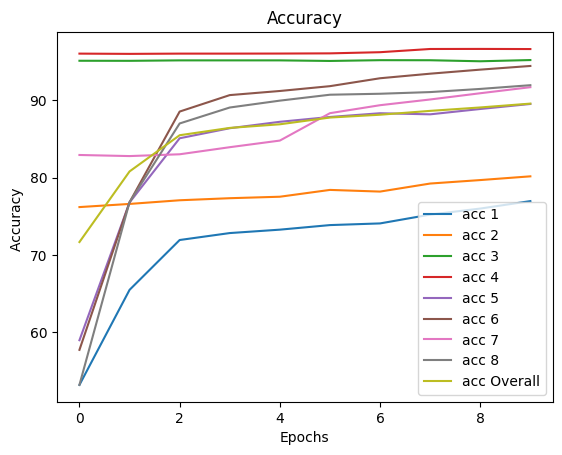

In [71]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot all 8 lists on the same plot
ax.plot(taskaccuracy[0],label='acc 1')
ax.plot(taskaccuracy[1],label='acc 2')
ax.plot(taskaccuracy[2],label='acc 3')
ax.plot(taskaccuracy[3],label='acc 4')
ax.plot(taskaccuracy[4],label='acc 5')
ax.plot(taskaccuracy[5],label='acc 6')
ax.plot(taskaccuracy[6],label='acc 7')
ax.plot(taskaccuracy[7],label='acc 8')
ax.plot(overallaccuracy,label='acc Overall')



# Set the x-axis label
ax.set_xlabel('Epochs')

# Set the y-axis label
ax.set_ylabel('Accuracy ')

# Set the title of the plot
ax.set_title('Accuracy')
ax.legend()
# Show the plot
plt.show()

In [73]:
droprates[0]

[tensor(0.9826, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.9923, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.9948, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.9973, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.9972, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.9962, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.9978, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.9966, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.9973, device='cuda:0', grad_fn=<DivBackward0>)]

In [79]:
def taskwise_activation_numpy(tensor_list):
  numpy_list = [tensor.cpu().detach().numpy() for tensor in tensor_list]

  return numpy_list


In [96]:
def Gactivation(tensor_list):
  numpy_list = [returnG(tensor).cpu().detach().numpy() for tensor in tensor_list]

  return numpy_list


In [83]:
def droprate_from_taskwise(tensor_list):
  numpy_list = [ 2*tensor.cpu().detach().numpy()-1 for tensor in tensor_list]

  return numpy_list

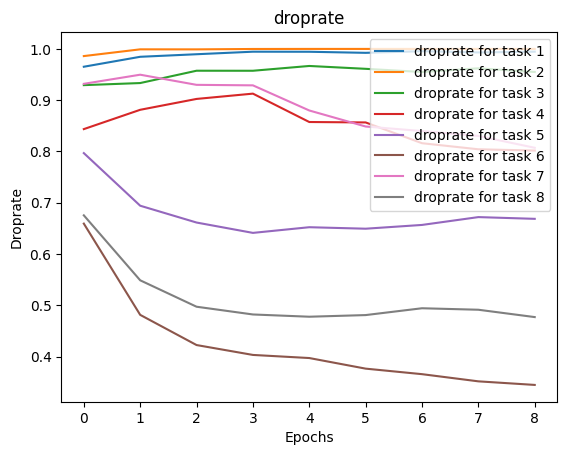

In [91]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots()


# Plot all 8 lists on the same plot
ax.plot(droprate_from_taskwise(droprates[0]),label='droprate for task 1')
ax.plot(droprate_from_taskwise(droprates[1]),label='droprate for task 2')
ax.plot(droprate_from_taskwise(droprates[2]),label='droprate for task 3')
ax.plot(droprate_from_taskwise(droprates[3]),label='droprate for task 4')
ax.plot(droprate_from_taskwise(droprates[4]),label='droprate for task 5')
ax.plot(droprate_from_taskwise(droprates[5]),label='droprate for task 6')
ax.plot(droprate_from_taskwise(droprates[6]),label='droprate for task 7')
ax.plot(droprate_from_taskwise(droprates[7]),label='droprate for task 8')




# Set the x-axis label
ax.set_xlabel('Epochs')

# Set the y-axis label
ax.set_ylabel('Droprate')

# Set the title of the plot
ax.set_title('droprate')
ax.legend(loc='upper right')
# Show the plot
plt.show()

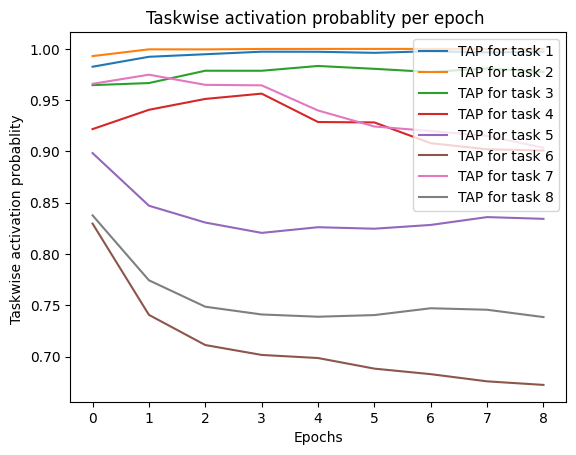

In [92]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot all 8 lists on the same plot
ax.plot(taskwise_activation_numpy(droprates[0]),label='TAP for task 1')
ax.plot(taskwise_activation_numpy(droprates[1]),label='TAP for task 2')
ax.plot(taskwise_activation_numpy(droprates[2]),label='TAP for task 3')
ax.plot(taskwise_activation_numpy(droprates[3]),label='TAP for task 4')
ax.plot(taskwise_activation_numpy(droprates[4]),label='TAP for task 5')
ax.plot(taskwise_activation_numpy(droprates[5]),label='TAP for task 6')
ax.plot(taskwise_activation_numpy(droprates[6]),label='TAP for task 7')
ax.plot(taskwise_activation_numpy(droprates[7]),label='TAP for task 8')




# Set the x-axis label
ax.set_xlabel('Epochs')

# Set the y-axis label
ax.set_ylabel('Taskwise activation probablity ')

# Set the title of the plot
ax.set_title('Taskwise activation probablity per epoch ')
ax.legend(loc='upper right')
# Show the plot
plt.show()

In [93]:
Activayionfortasks=[[],[],[],[],[],[],[],[]]

In [97]:
for i in range(8):
  Activayionfortasks[i]=Gactivation(droprates[i])

In [ ]:
Activayionfortasks

In [100]:
len(Activayionfortasks[1])

9

In [104]:
signal=Activayionfortasks[7]

In [119]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]


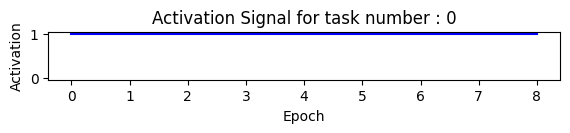

[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]


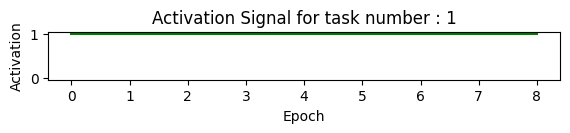

[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]


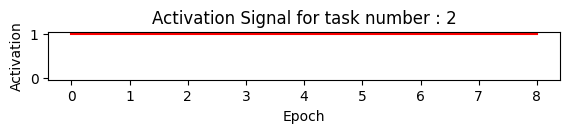

[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]


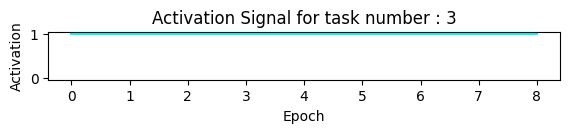

[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0., dtype=float32)]


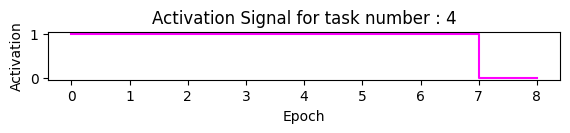

[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0., dtype=float32), array(1., dtype=float32)]


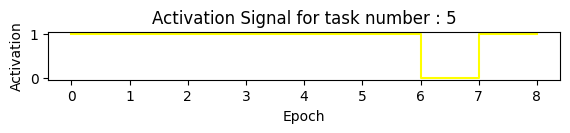

[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0., dtype=float32)]


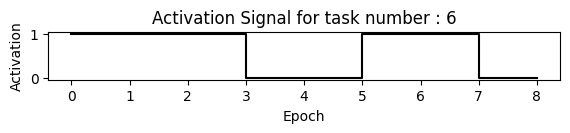

[array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0., dtype=float32)]


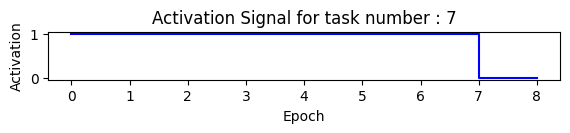

In [120]:
for i in range(8):
  signal=Activayionfortasks[i]
  x = list(range(len(signal)))
  print(signal)
  # plot the signal
  plt.step(x, signal,color=colors[i % len(colors)])
  
  task=i
  # add labels and title
  plt.xlabel('Epoch')
  plt.ylabel('Activation')
  plt.title(f'Activation Signal for task number : {task}')
  plt.ylim(-0.05, 1.05)
  plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.3)
  # display the plot
  plt.show()
  plt.close()